<a href="https://colab.research.google.com/github/ahsan856jalal/density_map_estimation/blob/main/marunet_testing_shanghai_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/rongliangzi/MARUNet.git

Cloning into 'MARUNet'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 175 (delta 76), reused 129 (delta 46), pack-reused 0
Receiving objects: 100% (175/175), 1.14 MiB | 3.57 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [3]:
!mv /content/MARUNet /content/drive/MyDrive/MARUNet


In [2]:
!cd /content/drive/MyDrive/MARUNet

# MAKING JSON LISTS

In [ ]:
import os
import json
img_dir = "/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/train_data/images/"

image_files = os.listdir(img_dir)
image_paths = [os.path.join(img_dir, file) for file in image_files]
print(image_paths)

json_file_path = "/content/drive/MyDrive/MARUNet/json/sha_train.json"
with open(json_file_path, "w") as json_file:
    json.dump(image_paths, json_file)

print("Image paths saved to:", json_file_path)

['/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/train_data/images/IMG_1.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/train_data/images/IMG_10.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/train_data/images/IMG_11.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/train_data/images/IMG_12.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/train_data/images/IMG_13.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/train_data/images/IMG_14.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/train_data/images/IMG_15.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/train_data/images/IMG_18.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/train_data/images/IMG_1

In [ ]:
import os
import json
img_dir = "/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/test_data/images/"

image_files = os.listdir(img_dir)
image_paths = [os.path.join(img_dir, file) for file in image_files]
print(image_paths)

json_file_path = "/content/drive/MyDrive/MARUNet/json/sha_val.json"
with open(json_file_path, "w") as json_file:
    json.dump(image_paths, json_file)

print("Image paths saved to:", json_file_path)

['/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/test_data/images/IMG_10.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/test_data/images/IMG_1.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/test_data/images/IMG_5.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/test_data/images/IMG_2.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/test_data/images/IMG_3.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/test_data/images/IMG_6.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/test_data/images/IMG_4.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/test_data/images/IMG_7.jpg', '/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/test_data/images/IMG_9.jpg', '/conten

VGG-**16** model from another repository

In [6]:
!wget --no-check-certificate "https://web.eecs.umich.edu/~justincj/models/vgg16-00b39a1b.pth" -d /content/drive/MyDrive/MARUNet/Models

DEBUG output created by Wget 1.21.2 on linux-gnu.

Reading HSTS entries from /root/.wget-hsts
URI encoding = ‘UTF-8’
Converted file name 'vgg16-00b39a1b.pth' (UTF-8) -> 'vgg16-00b39a1b.pth' (UTF-8)
--2024-06-06 15:10:25--  https://web.eecs.umich.edu/~justincj/models/vgg16-00b39a1b.pth
Resolving web.eecs.umich.edu (web.eecs.umich.edu)... 141.212.113.214
Caching web.eecs.umich.edu => 141.212.113.214
Connecting to web.eecs.umich.edu (web.eecs.umich.edu)|141.212.113.214|:443... connected.
Created socket 3.
Releasing 0x00005d1c833f1fd0 (new refcount 1).
Initiating SSL handshake.
Handshake successful; connected socket 3 to SSL handle 0x00005d1c833f3ad0
certificate:
  subject: CN=all.eecs.umich.edu,O=University of Michigan,ST=Michigan,C=US
  issuer:  CN=InCommon RSA Server CA 2,O=Internet2,C=US
  Unable to locally verify the issuer's authority.

---request begin---
GET /~justincj/models/vgg16-00b39a1b.pth HTTP/1.1
Host: web.eecs.umich.edu
User-Agent: Wget/1.21.2
Accept: */*
Accept-Encoding: i

In [7]:
!mv /content/vgg16-00b39a1b.pth /content/drive/MyDrive/MARUNet/Models/vgg16-00b39a1b.pth

CODE TO GENERATE H5 files but in location sha_...-.. folder and train and test folder inside

In [ ]:
!python /content/drive/MyDrive/MARUNet/data_prepare/make_sha_npy.py

In [ ]:
!python /content/drive/MyDrive/MARUNet/data_prepare/make_sh_gt.py

/content/drive/MyDrive/MARUNet/data_prepare/make_sh_gt.py:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter
 87% 26/30 [12:15<01:53, 28.34s/it]img: IMG_4.jpg , img_h, img_w: 334 ,  500 , new_h, new_w: 384 ,  574
100% 30/30 [14:03<00:00, 28.13s/it]


# SHANGHAI COMPLETE DATASRT

In [ ]:
!unzip /content/drive/MyDrive/MARUNet/shanghai_dataset_zip/shanghaitech.zip

Archive:  /content/drive/MyDrive/MARUNet/shanghai_dataset_zip/shanghaitech.zip
replace /content/drive/MyDrive/MARUNet/shanghai_dataset_zip/shanghai_dataset/shanghaitech/part_A_final/test_data/ground_truth/GT_IMG_1.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# TRAIN THE MODEL

In [8]:
!python /content/drive/MyDrive/MARUNet/train_generic.py --model MARNet --resume '0' --epochs 10 --dataset sha --train_json /content/drive/MyDrive/MARUNet/json/sha_train.json --val_json /content/drive/MyDrive/MARUNet/json/sha_val.json --loss mse+ssim --lazy_val 0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
objective dmp+amp!
front0.0.weight  parameters loaded!
front0.0.bias  parameters loaded!
front0.2.weight  parameters loaded!
front0.2.bias  parameters loaded!
front1.1.weight  parameters loaded!
front1.1.bias  parameters loaded!
front1.3.weight  parameters loaded!
front1.3.bias  parameters loaded!
front2.1.weight  parameters loaded!
front2.1.bias  parameters loaded!
front2.3.weight  parameters loaded!
front2.3.bias  parameters loaded!
front2.5.weight  parameters loaded!
front2.5.bias  parameters loaded!
front3.1.weight 

# visualize

In [8]:
!python /content/drive/MyDrive/MARUNet/visualize_feature.py --img_path "/content/drive/MyDrive/MARUNet/datasets/CrowdCounting/shanghaitech/part_A_final/test_data/images/IMG_10.jpg"

objective dmp+amp!
/content/drive/MyDrive/MARUNet/Models/MARNet_sha.pth  loaded!
save path is  /content/drive/MyDrive/MARUNet/figs/visual_feature/IMG_10
Directory created: /content/drive/MyDrive/MARUNet/figs/visual_feature/IMG_10
input_img.shape: torch.Size([1, 3, 768, 1024])


(48, 64) (48, 64)


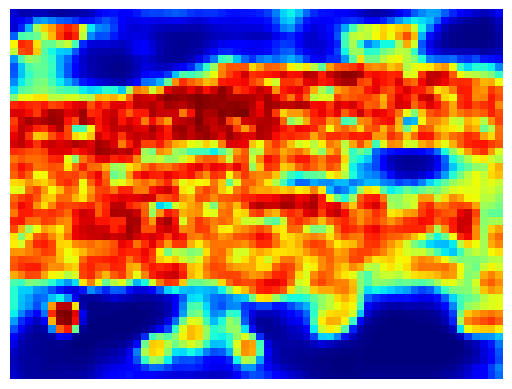

In [12]:
import numpy as np
amp_data=np.load('/content/drive/MyDrive/MARUNet/figs/visual_feature/IMG_10/sha130_amp4.npy')
fea_data=np.load('/content/drive/MyDrive/MARUNet/figs/visual_feature/IMG_10/sha130_xb4_after.npy')
print(amp_data.shape,fea_data.shape)
import matplotlib.pyplot as plt
from matplotlib import cm as CM

plt.imshow(amp_data, cmap=CM.jet)  # cmap='gray' for grayscale images
plt.axis('off')  # Turn off axis
plt.show()

# DSNET

In [ ]:
!git clone https://github.com/rongliangzi/Dense-Scale-Network-for-Crowd-Counting.git

Cloning into 'Dense-Scale-Network-for-Crowd-Counting'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 59 (delta 0), reused 0 (delta 0), pack-reused 58
Receiving objects: 100% (59/59), 32.03 KiB | 712.00 KiB/s, done.
Resolving deltas: 100% (24/24), done.


In [ ]:
!mv /content/Dense-Scale-Network-for-Crowd-Counting /content/drive/MyDrive/DSNET

In [ ]:
!cd /content/drive/MyDrive/DSNET

In [ ]:
!python /content/drive/MyDrive/DSNET/test_one_image.py --gpu 0 --model_path "/content/drive/MyDrive/MARUNet/MARNet_sha.pth" --test_img_path "/content/drive/MyDrive/DSNET/data/IMG_36.jpg"


Traceback (most recent call last):
  File "/content/drive/MyDrive/DSNET/test_one_image.py", line 3, in <module>
    import torch
  File "/usr/local/lib/python3.10/dist-packages/torch/__init__.py", line 1631, in <module>
    from torch import quantization as quantization
  File "/usr/local/lib/python3.10/dist-packages/torch/quantization/__init__.py", line 1, in <module>
    from .quantize import *  # noqa: F403
  File "/usr/local/lib/python3.10/dist-packages/torch/quantization/quantize.py", line 10, in <module>
    from torch.ao.quantization.quantize import (
  File "/usr/local/lib/python3.10/dist-packages/torch/ao/quantization/__init__.py", line 3, in <module>
    from .fake_quantize import *  # noqa: F403
  File "/usr/local/lib/python3.10/dist-packages/torch/ao/quantization/fake_quantize.py", line 5, in <module>
    from torch.ao.quantization.observer import (
  File "/usr/local/lib/python3.10/dist-packages/torch/ao/quantization/observer.py", line 15, in <module>
    from torch.ao.qua